In [1]:
import retro
import torch
import IPython.display
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

def environment_make():
    global environment
    if globals().get('environment'):
        environment.render(close=True)
        environment.close()

    environment = retro.make(game='SuperMarioBros-Nes')
    
    return environment

In [ ]:
images = []
env.reset()

action = env.action_space.sample()

obs, rew, done, info = env.step(action)

In [ ]:
import json

def frame_draw(frame):
    height, width, colors = frame.shape
    frame_json = json.dumps(frame.tolist())
    
    return IPython.display.HTML("""
    <canvas id="myCanvas" width="%(width)s" height="%(height)s"></canvas>
    <script>
        c = document.getElementById("myCanvas");
        c.style.width = %(width)s*8/7 + 'px';
        c.style.height = %(width)s + 'px';
        
        var context = c.getContext("2d");
        context.scale(2, 2);
        
        frame = %(frame_json)s;
        height = frame.length;
        width = frame[0].length;

        for (var i = 0; i < width; i++) {
            for (var j = 0; j < height; j++) {
                context.beginPath();
                context.rect(i, j, 4, 4);
                context.fillStyle = 'rgb(' + frame[j][i].join(',') + ')';
                context.fill();
            }
        }
    </script>
    """ % {'frame_json': frame_json, 'width': 2*width, 'height': 2*height})
    
frame_draw(observation)

## ozx

In [ ]:
240 / 16, 224 / 16

In [ ]:
comps=[[0,1,3],[0,2,1],[0,2,3],[0,3,1],[0,3,2],[1,0,2],[1,0,3],[1,2,0],[1,2,3],[1,3,0],[1,3,2],[2,0,1],[2,0,3],[2,1,0],[2,1,3],[2,3,0],[2,3,1],[3,0,1],[3,0,2],[3,1,0],[3,1,2],[3,2,0],[3,2,1]]

torch.Size([14, 16, 16, 15, 3])
torch.Size([16, 15, 3])


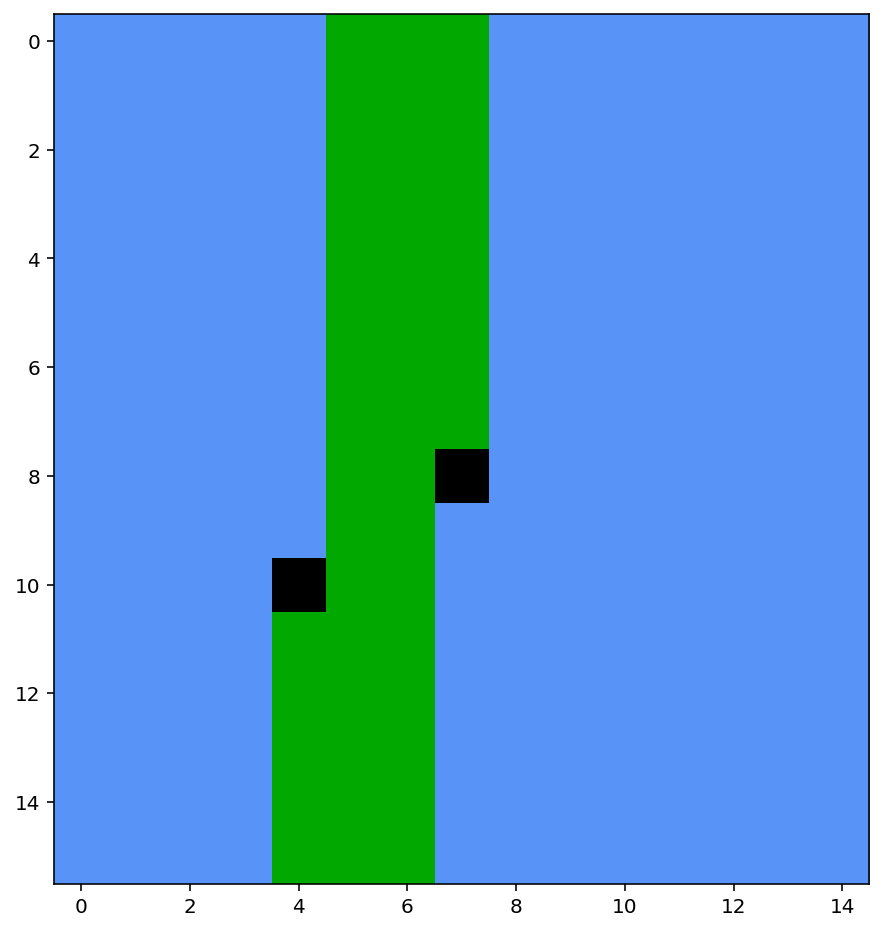

In [3]:
environment_make()
environment.reset()

action = environment.action_space.sample()

observation, rew, done, info = environment.step(action)

fig, ax = plt.subplots(figsize=(8, 8))

blocks = torch.tensor(observation).reshape(14, 15, 16, 16, 3).permute(0, 2, 3, 1, 4)
print(blocks.shape)
print(blocks[11][11].shape)
# print(blocks[11][11])
ax.imshow(blocks[11][11])


In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(torch.tensor(observation).reshape(-1, 224, 240, 3).permute(3, 1, 2, 0)[0]);
ax.axis('off');

In [ ]:
filters

In [ ]:
image

In [ ]:
filters = torch.randn(8,3,3,3)
inputs = torch.randn(1,3,1,2)
F.conv2d(image.float(), weight=filters, padding=1)

In [ ]:
import torch.nn.functional as F

# image = torch.tensor(observation, dtype=float) #.reshape(-1, 3, 224, 240)
# print(image.shape)

t = torch.tensor(observation, dtype=float)
r, g, b = t[:,:,0], t[:,:,1], t[:,:,2]
image = torch.stack([r, g, b]).unsqueeze(0)
print("t", t.shape)


t = torch.tensor(observation, dtype=float).unsqueeze(0)
# r, g, b = t.permute(0, 3, 1, 2)
# image = torch.stack([r, g, b]).unsqueeze(0)
image = t.permute(0, 3, 1, 2)
print("t", t.shape)



filter_ = torch.tensor([[
    [[1, 1], [1, 1]],
    [[1, 1], [1, 1]],
    [[1, 1], [1, 1]]
]], dtype=float)

filter_ = filter_ / 4
filter_[0,0] = 0
filter_[0,1] = 0
filter_[0,2] = 1
print(filter_)
print(filter_.shape)
output = F.conv2d(input=image,
                  weight=filter_,
                  stride=2)

print("output:", output.shape)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(output.reshape(-1, 112, 120, 1)[0], cmap='gray')

In [ ]:
224*240, 224*240/16/16/15

In [ ]:
torch.ones(4, 4)

In [ ]:
588*16*16,224*240

In [ ]:
def block_partition(matrix, block_width):
    total_width = matrix.shape[0]
    
    matrix = matrix.reshape(-1, block_width, total_width // block_width, block_width)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width)
    
    return matrix

t = torch.tensor(observation)
r, g, b = t.permute(2, 0, 1)
t= t.permute(2, 0, 1)

print(r.shape)

r = block_partition(r[:224,:224], 16)
print(r.shape)

r = r[-40]
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(r);

In [ ]:

t = torch.tensor(observation) #.unsqueeze(0)
# r, g, b = t.permute(0, 3, 1, 2)[0]
print("t", t.shape)
print("r", r.shape)

r = t
r = r.reshape(14, 15, 16, 16, 3)
r = r.permute(0, 1, 3, 2, 4)
r = r[-4][-7]

print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(r)

In [ ]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(r);

exponent = 1

# [hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t]

In [2]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

k = set([tuple(block.flatten().tolist()) for block in t])
# k = sorted(list(k))
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

print(len(set([hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t])))
print(len(blocks))
ax.imshow(blocks[-5])

NameError: name 'observation' is not defined

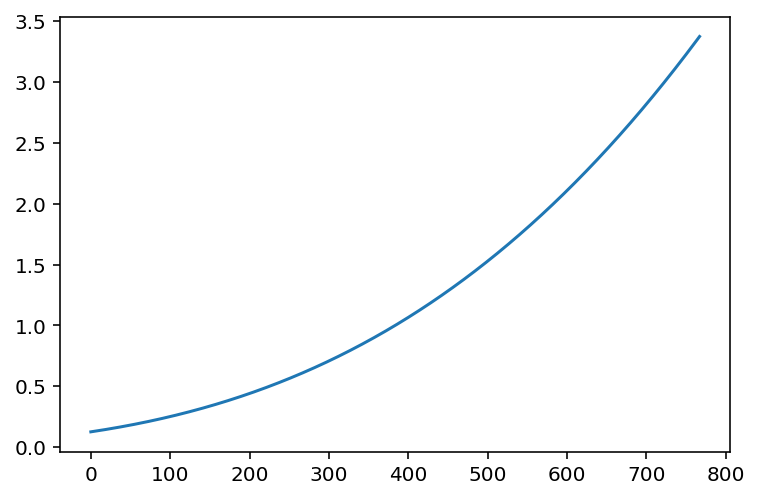

In [41]:
a1 = torch.linspace(0.5, 1.5, 16*16*3)**3

plt.plot(a1)

torch.Size([224, 240, 3])
torch.Size([196, 16, 16, 3])
torch.Size([16, 16, 3])
[0.7921485304832458, 0.9586583971977234, 0.9322603940963745, 0.8646268844604492, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.8901470899581909, 0.9529489874839783, 0.917827844619751, 0.7921485304832458, 0.8898940682411194, 0.9515265822410583, 0.7921485304832458, 0.8178447484970093, 0.8178447484970093, 0.8178447484970093, 0.7921485304832458, 0.782853901386261, 0.8178447484970093, 0.7921485304832458, 0.7921485304832458, 0.810614824295044, 0.8033480644226074, 0.7921485304832458, 0.8063144683837891, 0.8178447484970093, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.8417813777923584, 0.8400060534477234, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7921485304832458, 0.7

AttributeError: 'float' object has no attribute 'tolist'

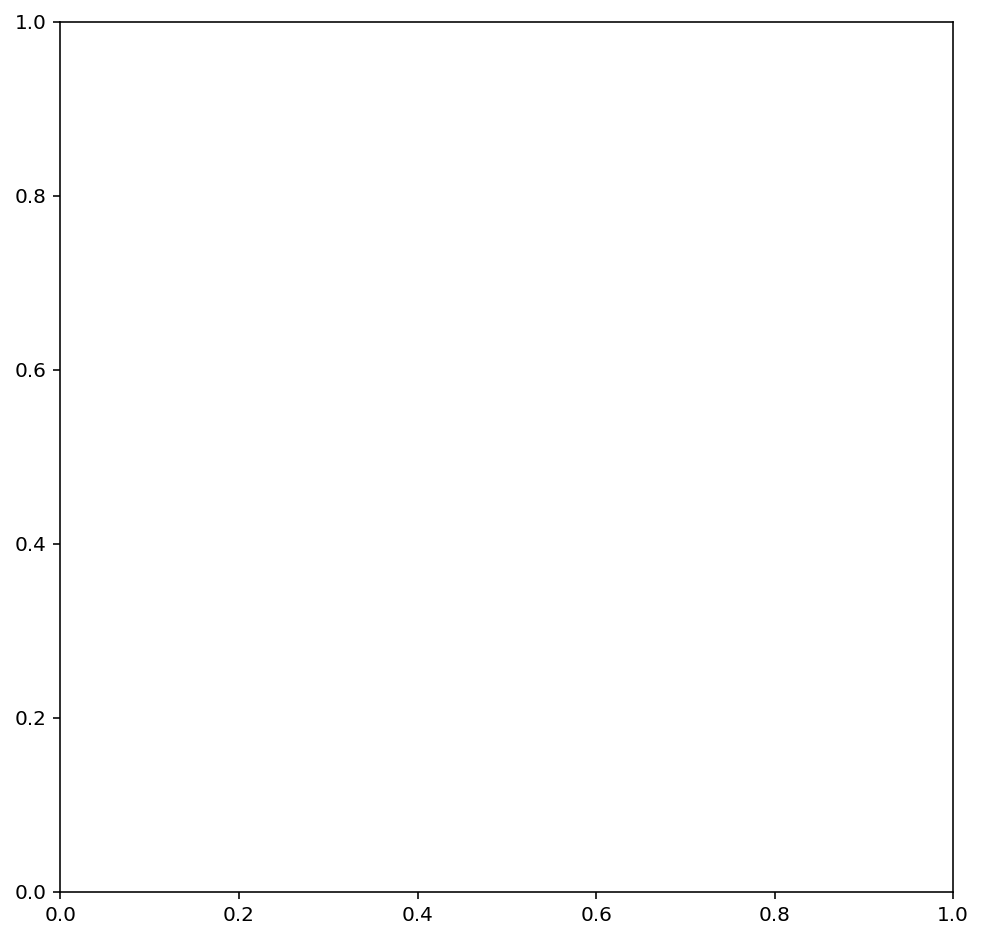

In [175]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

print(t.shape)

t = block_partition(t[:224,:224], 16)
print(t.shape)

# t = t[-40]
r = t[-40]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

asymmetric = torch.linspace(0.5, 1.5, 16*16*3)**3

k = [((block.flatten().float() @ asymmetric / 16 / 16 / 3 / 255)).item() for block in t]
print(k)
k = set(tuple(block.tolist()) for block in k)
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

len(blocks)

In [64]:
t[0].flatten().float() @ asymmetric

tensor(155134.3750)

In [94]:
torch.chunk()

TypeError: chunk() missing 2 required positional argument: "input", "chunks"

In [90]:
torch.

['AVG',
 'AggregationType',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CONV_BN_FUSION',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'CudaBFloat16StorageBase',
 'CudaBoolStorageBase',
 'CudaByteStorageBase',
 'CudaCharStorageBase',
 'CudaComplexDoubleStorageBase',
 'CudaComplexFloatStorageBase',
 'CudaDoubleStorageBase',
 'CudaFloatStorageBase',
 'CudaHalfStorageBase',
 'CudaIntStorageBase',
 'CudaLongStorageBase',
 'CudaShortStorageBase',
 'DeepCopyMemoTable',
 'DeviceObjType',
 'DictType',
 'DoubleStorage',
 'DoubleTensor',
 'ErrorReport',
 'ExecutionPlan',
 'ExtraFilesMap',
 'FatalError',
 'FileCheck',
 'FloatStorage',

In [123]:
tensor.unsqueeze(0).shape

torch.Size([1, 224, 240, 3])

In [158]:
import torch.nn.functional as F

tensor = torch.tensor(observation)

print(tensor.shape)
tensor = tensor.unsqueeze(0)
print(tensor.shape)

unf1 = F.unfold(input=tensor.float(),
                kernel_size=(4, 4),
                stride=3)

plt.imshow(unf1[0])

torch.Size([224, 240, 3])
torch.Size([1, 224, 240, 3])


RuntimeError: Given input with spatial size (240, 240), kernel_size=(4, 4), dilation=(1, 1), padding=(0, 0), calculated shape of the array of sliding blocks as (79, 0), which is too small (non-positive).

torch.Size([240, 240, 3])
torch.Size([225, 16, 16, 3])
torch.Size([16, 16, 3])
35
36


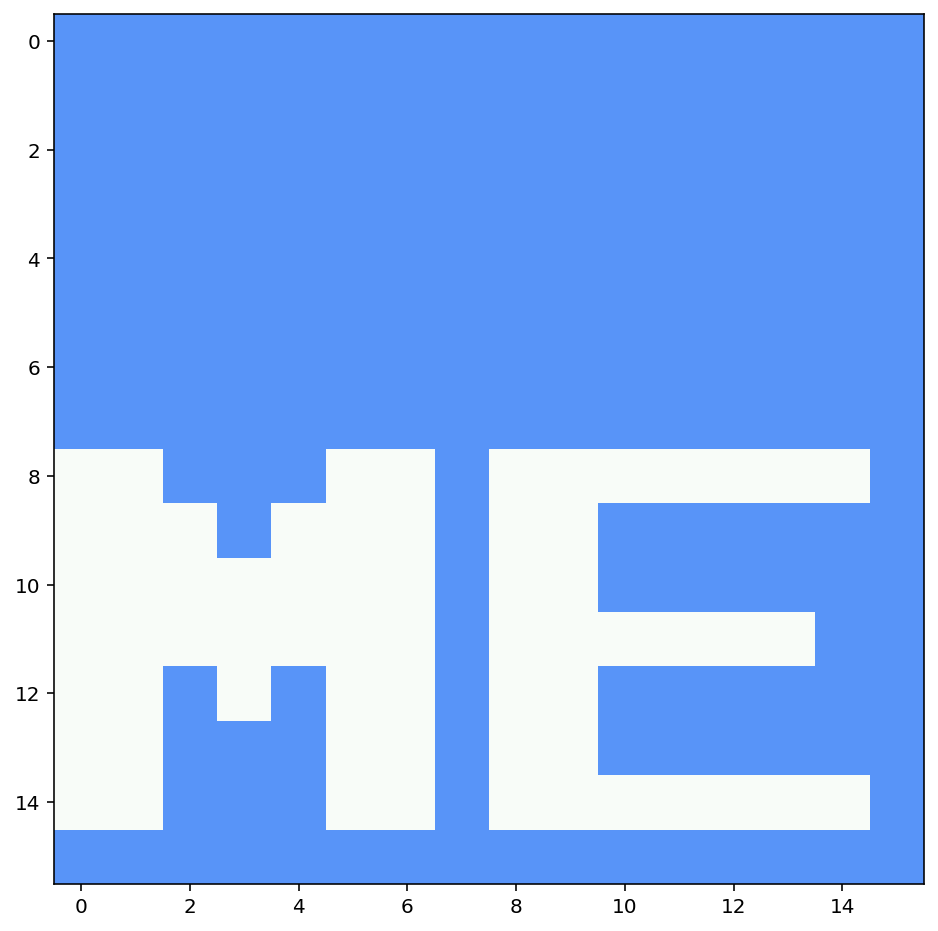

In [4]:
def block_partition(matrix, block_width):
    matrix = matrix.reshape(-1, block_width, matrix.shape[0] // block_width, block_width, 3)
    matrix = matrix.transpose(2, 1).reshape(-1, block_width, block_width, 3)
    
    return matrix

t = torch.tensor(observation)

t = torch.cat([
    torch.tensor(observation),
    torch.zeros(16, 240, 3)
]).long()

print(t.shape)

t = block_partition(t, 16)
print(t.shape)

r = t[-212]
print(r.shape)

fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(r);

exponent = 1

k = set([tuple(block.flatten().tolist()) for block in t])
# k = sorted(list(k))
blocks = [torch.tensor(block).reshape(16, 16, 3) for block in k]

print(len(set([hash(((block.float() / 255 / 16 / 16).sum()**exponent).item()) % 255 for block in t])))
print(len(blocks))
ax.imshow(r)

In [13]:
r;

In [12]:
PIL.Image.fromarray?

In [29]:
import PIL.Image

PIL.Image.fromarray(r.byte().numpy())

In [27]:
plt.imsave('/workfolder/toast.png', r.byte().numpy())

In [28]:
!open /workfolder/toast.png

/usr/bin/sh: 1: open: not found
